In [35]:
import pandas as pd
%matplotlib notebook
MONTH = '2016-02'
data = pd.read_hdf('/mnt/raw/clean/%s.h5' % MONTH, 'data')
columns = {
    "FFY28016.P01" : "T1_T2_Ratio",
    "TH006RATIO.CPV" : "T12_T3_Ratio",
    
    "3311HS181A.PV" : "Throughput",
    
    "CalcCY03FRC1.CPV" : "T1_Size",
    "CY02FRC1.CPV" : "T2_Size",
    "3313AI531.PV" : "T3_Size",

    "MIY22937.CPV" : "T1_Output",
    "MIY22953.CPV" : "T2_Output",
    "3312FY078.CPV" : "T3_Output",
    
    "SI82603": "P1_Speed",
    "SI82605": "P2_Speed",
    
    "SI22313.PV": "P1_Hz",
    "SI22315.PV": "P2_Hz",
    
    "PI22925.PV": "P1_Pressure",
    "PI22941.PV": "P2_Pressure",
    
    "MIY22937.CPV": "P1_Mass",
    "MIY22953.CPV": "P2_Mass",
    
    "3311WI671.PV": "Spew",
    }
dead_columns = ["T1_T2_Ratio", "T12_T3_Ratio", "SN2001.PV", "SN2002.PV", "3311FV380B.PV",
                "CR002RUN", "CR003RUN", "3311FV690B.PV", "3312DI075.PV", "3312DI075A.PV"]
data.rename(columns=columns, inplace=True)
for c in dead_columns:
    del data[c]

In [36]:
day_data = data.loc[pd.Timestamp('2016-02-20') : pd.Timestamp('2016-03-01')]

<IPython.core.display.Javascript object>


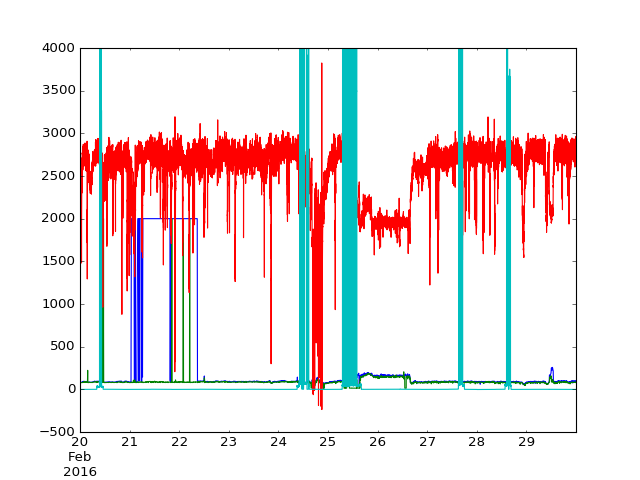

(<matplotlib.axes._subplots.AxesSubplot at 0x7f744b716470>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f744b716470>)

In [37]:
day_data.T1_Size.plot(), day_data.T2_Size.plot()

In [38]:
day_data.Throughput.plot()

In [62]:
A = day_data.iloc[:109]
X = day_data.iloc[1:110]
# print(A.shape)
# print(X.shape)
import numpy.linalg as npl
import numpy as np
B = npl.lstsq(A, X)[0]
print(B)
print(np.dot(A, B))
# print(X)
delta = np.dot(A, B) - X
print(delta)

[[ -4.44571288e-01   1.72570764e-01  -2.00325316e-01 ...,  -1.31747838e-14
    2.65164170e-03  -7.22856677e-05]
 [ -2.50505127e-02   1.49386349e-01  -7.56117855e-02 ...,  -2.00048311e-14
    2.70109631e-03   5.19855233e-05]
 [  1.71616077e-02   3.76111360e-02  -2.95315200e-01 ...,  -1.45147566e-15
    9.16791660e-05  -6.99744325e-05]
 ..., 
 [  7.49264349e+01   9.99221132e+03  -6.10143884e+03 ...,   6.80775926e-06
    6.53859490e+01  -7.64852045e+00]
 [  1.51711209e+01  -1.65736600e+01   4.33303071e+01 ...,  -1.85888173e-12
    2.35647600e+00  -9.30619187e-03]
 [  8.43738576e+01  -5.30717531e+02   5.88593057e+01 ...,   5.99994406e-12
    9.95258690e+00   8.85839897e-01]]
[[  9397.51868874   9354.17252148  15438.16661779 ...,   1127.5
    1127.19924712     33.3404505 ]
 [  9359.19178879   9406.14124768  15317.03097925 ...,   1127.5
    1127.79661603     33.17910254]
 [  9374.88420017   9421.92402303  15298.0227501  ...,   1127.5
    1128.58643744     33.02255478]
 ..., 
 [  9416.3877169

<IPython.core.display.Javascript object>


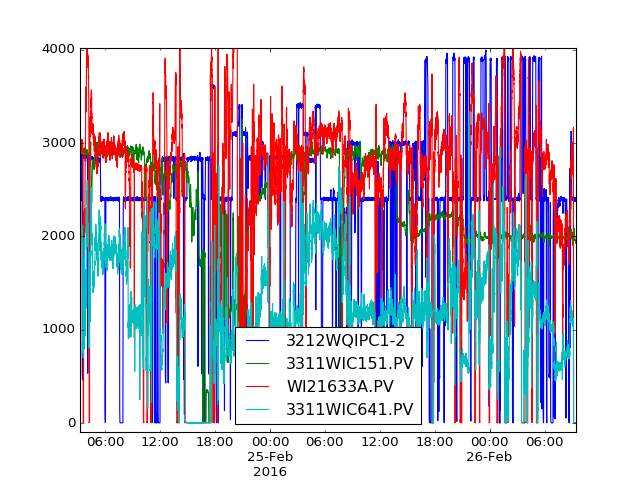

In [68]:
day_data[["3212WQIPC1-2", "3311WIC151.PV", "WI21633A.PV", "3311WIC641.PV"]].plot()